In [32]:
from sklearn import metrics, ensemble
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [33]:
print('Reading and Merging Data')
train = pd.read_csv('input/train_1.csv')
train = train.sample(frac=0.5)
songs = pd.read_csv('input/songs.csv')
train = pd.merge(train, songs, on='song_id', how='left')
del songs
members = pd.read_csv('input/members.csv')
train = pd.merge(train, members, on='msno', how='left')
del members
song_extra_info = pd.read_csv('input/song_extra_info.csv')
train = pd.merge(train, song_extra_info, on='song_id', how='left')
del song_extra_info
print('Reading complete')
print('Handle Nulls')
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
train = train.fillna(value=0)

print('Flatten the dates')
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d', errors='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day
del train['registration_init_time']
del train['expiration_date']

print('Handling the categorical Features')
categorical_feature = train.dtypes==object
categorical_cols = train.columns[categorical_feature].tolist()

print('Label Encode the values')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

Reading and Merging Data
Reading complete
Handle Nulls
Flatten the dates
Handling the categorical Features
Label Encode the values


In [97]:
print('Training and Calculating Accuracy')
#target = train.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split(train, target, test_size = 0.3)
model = xgb.XGBClassifier(max_depth=3, learning_rate=0.3, n_estimators=300, n_jobs=8)
model.fit(train_data, train_labels)
predict_labels = model.predict(test_data)
print(metrics.accuracy_score(test_labels, predict_labels))

Training and Calculating Accuracy
0.7370266666666667


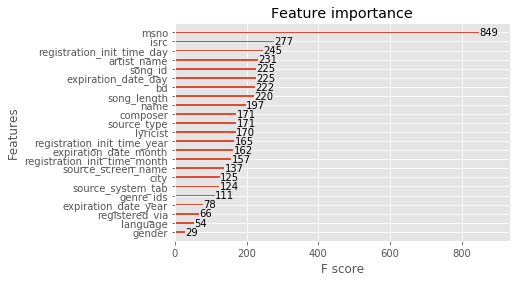

In [66]:
xgb.plot_importance(model)

In [98]:
graph_to_save = xgb.to_graphviz(model, rankdir='LR')
graph_to_save.format = 'png'            
graph_to_save.render('xgb_tree')  

'xgb_tree.png'

In [103]:
#=test_data.iloc[0-5]

predictest=test_data.head(n=5)

In [104]:
predictest.to_csv('predictest.csv')
(predictest)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,gender,registered_via,name,isrc,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
431412,12101,8209,0,10,5,326243.0,204,14583,21207,8046,...,2,7,47012,36945,2010,5,29,2017,10,1
1474,4792,41923,6,0,0,221727.0,204,11979,23434,9664,...,2,7,52702,45737,2016,2,6,2018,2,4
81622,13243,28169,3,7,3,281573.0,209,3071,22536,8735,...,0,9,37498,7481,2005,7,19,2017,9,30
127565,7959,11154,3,7,3,290586.0,209,13073,27130,13715,...,0,9,61717,37812,2010,5,23,2017,9,26
384004,9401,70094,3,7,3,262112.0,209,12786,17175,7229,...,1,3,63446,42654,2016,11,12,2016,12,3


In [105]:
pred = model.predict(predictest)

In [106]:
print(pred)

[1 1 1 1 0]
